#Рекомендательные системы

##Введение

**Рекомендательная система** — программный компонент, который по истории взаимодействий пользователя с объектами и/или по свойствам самих объектов предлагает новые, которые, скорее всего, будут интересны пользователю. Рекомендательные системы применяются там, где объектов много и нужно быстро находить релевантные.



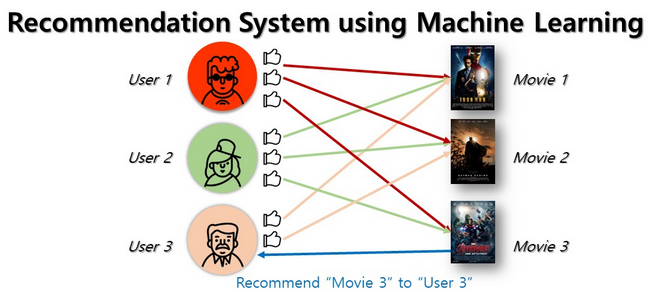


###Примеры

* **Видеохостинг**: подбор видео в ленте на основе истории просмотра.
* **Социльная сеть**: рекомендация новых друзей на основе уже указанных, рекомендованные сообщества.  
* **Интернет-магазин**: выдача наиболее интересных товаров.
* **Музыкальный сервис**: персональные плейлисты с музыкой.
* **Новостной агрегатор**: подбор статей по интересующей тематике на основе прочтённых ранее.


Под **релевантностью**, то есть степенью интересности, в каждом продукте понимают своё. Чаще всего это то, что повышает ключевые продуктовые метрики: вовлечение, удержание и т. п.

## Поиск и рекомендации

В задаче **поиска** пользователь формулирует явный запрос. В задаче **рекомендаций** явного запроса нет — есть лишь следы поведения: клики, просмотры, покупки, оценки. Рекомендательная система должна по этим следам восстановить предпочтения пользователя и предложить ему полезные объекты.

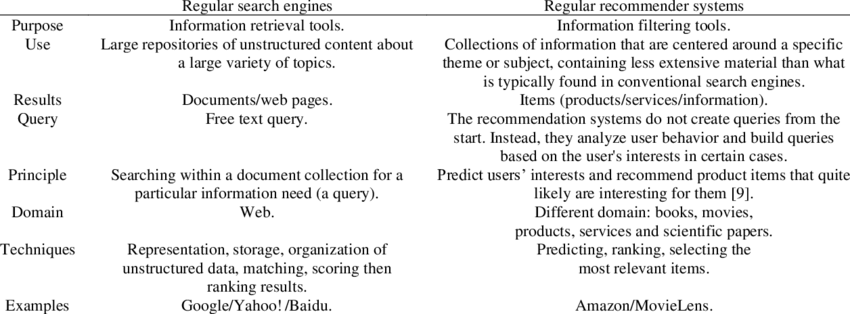

Это ключевое различие диктует следующую архитектуру:

1. Система быстро отбирает **кандидатов** — небольшой набор потенциально подходящих объектов.
2. К кандидатам применяется более точный **скоринг** — числовая оценка релевантности объектов.
3. Объекты упорядочиваются по скору, то есть **ранжируются**, формируется выдача из объектов с лучшим скором.
4. **Переранжирование** ($reranking$) — дополнительная перестановка объектов после скоринга с учётом бизнес-правил. Например, чтобы повысить разнообразие или подавать более свежие материалы.

Artboard_22_copy_b853d2a0c5_18adbac397.svg

## Формализация задачи

Пусть $U = \{u\}$ — множество **пользователей**, $I = \{i\}$ — множество **объектов** (айтемов).

Для пользователя $u\in U$ известны объекты $I_u = \{i_u\} \subset I$, с которыми он взаимодействовал, и, возможно, численные оценки $R_u=\{r(u,i)\}_{i\in I_u}$. Отзыв пользователя $r(u,i)$ о взаимодействии с объектом называют **фидбэком**. Эти данные обычно хранятся в виде таблицы взаимодействий.

**Ранжирующая модель** — модель, которая для каждого пользователя $u$ и для каждого объекта $i\in I\setminus I_u$ предсказывает значения $\hat r(u, i)$ — оценку ожидаемого фидбэка $r(u,i)$.

Для получения выдачи объекты сортируют по убыванию этого числа и показывают первые $K$. Часто нам не обязательно давать корректные абсолютные значения рейтингов, достаточно корректного порядка объектов.

## Explicit и implicit feedback

**Explicit (явный) фидбэк** — это прямые оценки $r(u,i)$ от пользователя $u$, когда он явно сообщает своё отношение к объекту $i$: числовые рейтинги по шкале от 1 до 5, лайки и дизлайки, текстовые рецензии. Но таких данных мало, поскольку пользователи редко оставляют оценки вручную.

На практике **явные** сигналы обычно формулируют как задачу регрессии или классификации — предсказывают оценку пользователя.


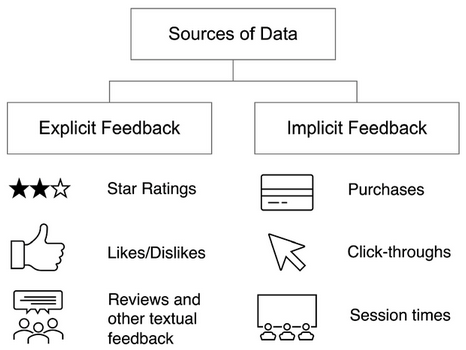

**Implicit (неявный) фидбэк** получается из наблюдаемого поведения: клики, просмотры и их длительность, добавления в корзину, покупки, а также сессионные действия вроде скролла и удержания. Эти данные доступны в большем объёме и покрывают большинство пользователей, однако они шумные и неоднозначные, потому что само действие не всегда означает положительную оценку.

**Неявные** сигналы чаще представляют бинарной целью — было взаимодействие или нет — либо используют схему с весами доверия, где более частые или длительные взаимодействия получают больший вес при обучении.

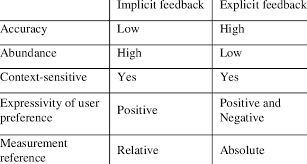

Во всех случаях важно моделировать **систематические смещения**: одни пользователи в среднем ставят более высокие оценки, другие — более низкие, а некоторые предметы в целом популярнее. Для этого часто используют модель с базовой частью вида:

$$\hat r_{ui} = \mu + b_u + b_i + \text{персонализированная часть},$$

где $μ$ — глобальная средняя, $b_u$ — смещение пользователя, $b_i$ — смещение предмета, а персонализированная часть описывает конкретные взаимодействия.

## Коллаборативные рекомендационные методы


###Общее описание

Одним из подходов к рекомендации является **коллаборативная фильтрация**. Она основывается на идее, что схожие пользователи интересуются схожими объектами, а объекты, которые часто выбирают одни и те же пользователи, тоже похожи.

Поэтому предполагаемую оценку $\hat r(u, i)$, которую выставил бы $u$, можно формировать на основе оценок, выставленных другими похожими пользователями — это называется $User-to-User$ подходом. Или же отметку товару можно выставлять на основе отметок похожих на него товаров — $Item-to-Item$ подход.

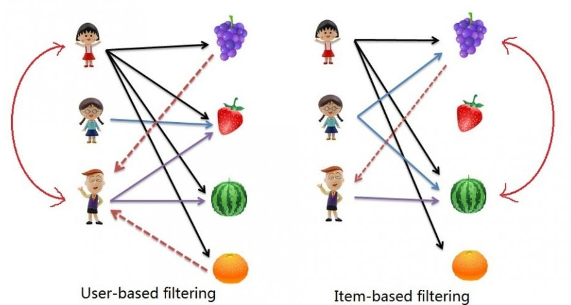

### User-to-User (user2user)

Найдём **пользователей**, похожих на целевого $u$, и предскажем для него оценку на основе чужих оценок.

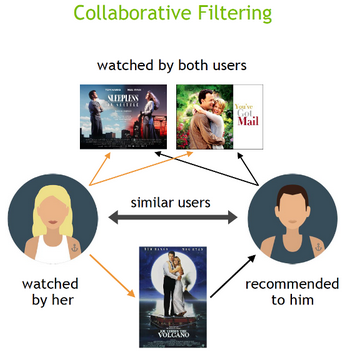

Пусть $s(u,v)$ — мера **схожести** ($similarity$) между пользователями $u$ и $v$. Например, она может изменяться от $0$ до $1$. Определим минимальное значение, при котором пользователей можно назвать похожими, как $\alpha$. Например, оно равно $0.5$ или $0.9$. Обозначим множество похожих пользователей $N(u)=\{v\neq u\mid s(u,v)>\alpha\}$.

Тогда базовая **формула** предсказания — взвешенная сумма оценок по всем пользователям, где вес равен схожести между пользователями:

$$\hat r_{ui} = \frac{\sum_{v\in N(u)} s(u,v) r_{vi}}{\sum_{v\in N(u)} |s(u,v)|}$$

Но одни пользователи закономерно ставят низкие оценки, другие высокие. Чтобы компенсировать разные шкалы оценок, используют **центрирование**. Вычисляется, насколько оценка данного объекта отличается от оценки, которую пользователь выставляет в среднем:

$$\hat r_{ui} = \bar r_u + \frac{\sum_{v\in N(u)} s(u,v)(r_{vi}-\bar r_v)}{\sum_{v\in N(u)} |s(u,v)|}$$

Формулу можно уточнить ещё больше, если учитывать разброс отметок каждого пользователя, а не только отличие отметок от среднего.

### Item-to-Item (item2item)

Метод состоит в том, что для заданного объекта $i$ можно найти **похожие объекты**, которые оценивал пользователь $u$, и предсказывать $\hat r_{ui}$ на основе оценок, которые выставил пользователь, и схожестей этих объектов с $i$.


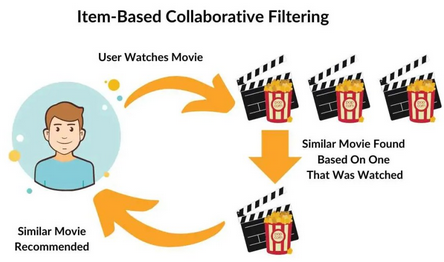

Обозначим множество похожих на $i$ объектов $N(i)=\{j \neq i \mid s(i,j)>\alpha\}$, здесь $\alpha$ — заданный порог схожести. Тогда предсказание вычисляется по формуле:

$$
\hat r_{ui} = \frac{\sum_{j\in N(i)} s(i,j) r_{uj}}{\sum_{j\in N(i)} |s(i,j)|}.
$$

Item-to-item предпочтителен, когда объект только что разместили на платформе. Можно заранее (офлайн) выбрать $K$ наиболее похожих объектов и при необходимости агрегировать их.

## Контентные рекомендации

###Суть метода

Помимо коллаборативного существует **контентный** ($content-based$) подход, при котором рекомендации строятся на основе свойств самих объектов. Предполагается, что пользователю будут интересны объекты, похожие **по содержанию** на те, с которыми он уже положительно взаимодействовал. Таким образом, нам не требуются оценки объектов, достаточно знать их числовые характеристики.






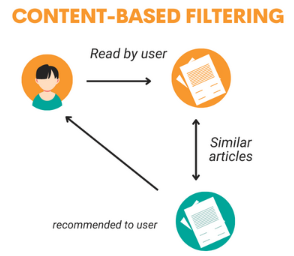

Каждый объект $i$ описывается числовым вектором признаков $e_i \in \mathbb{R}^n,$ который кодирует его содержательные характеристики. Такой вектор будем называть **контентным представлением** объекта.

**Например**, описание двух фильмов $i$ и $j$, о которых известна длительность в минутах, год выхода, код жанра (комедия — 0, драма — 1, исторический — 2 и т. д.), то представление будет иметь вид:

$$e_i = \{110,\ 1999,\ 3\},$$
$$e_j = \{95,\ 2011,\ 0\}$$

###Оценка релевантности

Для пользователя $u$ **рекомендация** нового объекта $i$ строится через сравнение $i$ с уже известными пользователю объектами $I_u$. Простейшая схема скоринга выглядит так:

$$\hat r(u,i) = \max_{j \in I_u} s(i, j) = \min_{j \in I_u} \rho(e_i, e_j),$$

где $\rho$ — расстояние между векторами, которое может вычисляться для каждой характеристики (элемента вектора) по собственному правилу, а затем усредняться по всем характеристикам с учётом их веса.

Таким образом, объект считается **релевантным**, если он достаточно похож хотя бы на один объект $i$, который пользователю уже понравился, то есть расстояние между их контентными представлениями мало.

###Свойства

Контентный подход имеет важные **свойства**:

* Не требует данных о других пользователях.
* Рекомендации легко интерпретируемы.
* При этом плохо учитывает эффект неожиданности и склонен замыкаться в узком интересе пользователя — эффект информационного **пузыря** ($filter\ bubble$).

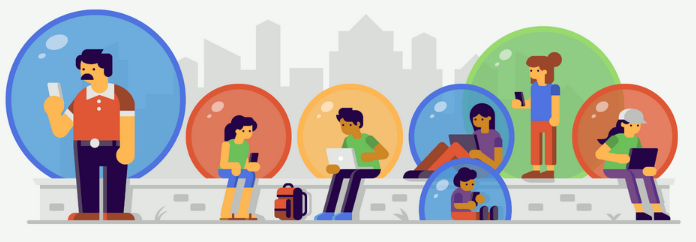

## Гибридные рекомендации

На практике контентный и коллаборативные подходы редко используются по отдельности. Чаще применяют **гибридные модели**, которые объединяют несколько источников сигнала:

* **Коллаборативная** часть хорошо работает для популярных объектов;
* **Контентная** часть компенсирует недостаток данных, когда информация о взаимодействии пользователей с объектами ещё не собрана.
* **Итоговый скоринг** получается как взвешенная комбинация сигналов.


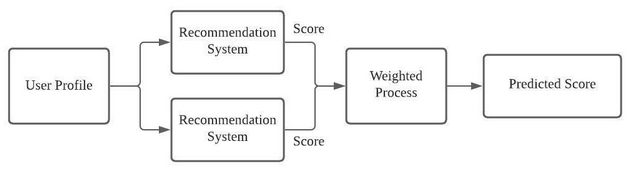

## Методы оценки схожести

Для построения рекомендаций важно уметь вычислять **схожесть** $s(u, v)$ между пользователями $u$ и $v$ или $s(i, j)$ объектами $i$ и $j$.

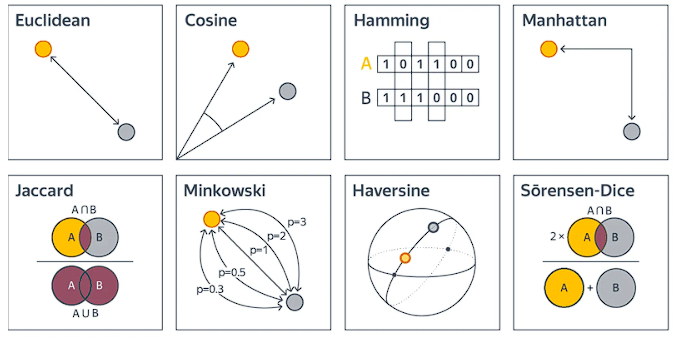

###Косинусное расстояние

Допустим, два ученика, отличник $x$ и хорошист $y$, описываются набором из четырёх чисел — отметками по математике, русскому языку, физике и информатике. Тогда эти описания представимы как $4$-мерные векторы: $\{5, 4, 5, 5\}$ и $\{4, 4, 4, 5\}$. Схожесть можно вычислить как косинус между этими многомерными векторами, то есть через **косинусное расстояние**:

$$\cos(x,y)=\frac{x\cdot y}{|x||y|}$$

Подставим числа:

$$\cos(x,y) = \frac{5 \cdot 4 + 4 \cdot 4 + 5 \cdot 4 + 5 \cdot 5}{\sqrt{5^2 + 4^2 + 5^2 + 5^2} \sqrt{4^2 + 4^2 + 4^2 + 5^2}} = \frac{81}{\sqrt{91} \cdot \sqrt{73}} \approx 0.993$$

Значение близко к единице, то есть отличник и хорошист похожи по отметкам.

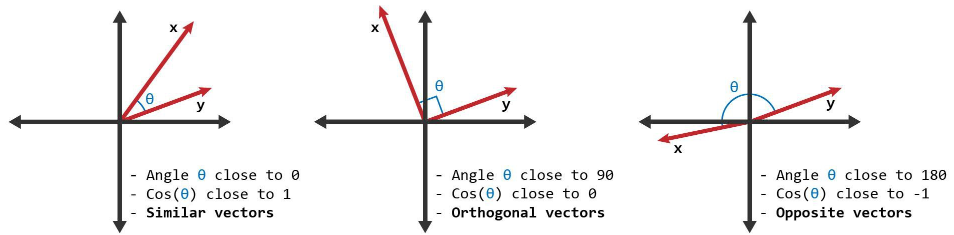

###Коэффицент Жаккара

Положим, для двух фильмов указаны жанры, к которым они относятся, в виде множеств $A$ и $B$. Тогда схожесть можно вычислить как **коэффициент Жаккара**, то есть отношение совпавших категорий ко всем указанным для этих двух фильмов:

$$J(A,B)=\frac{|A\cap B|}{|A\cup B|}$$

Например, если $A = \{драма, ромком\}$ и $B = \{ужасы, триллер, авторское\}$, то пересечение равно пустому множеству и коэффициент Жаккара равен $0$, фильмы непохожи.

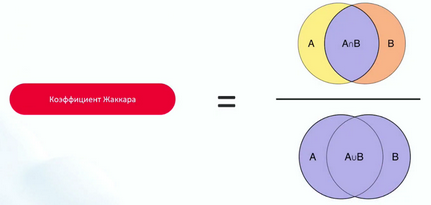

###Нормализованное расстояние

Допустим, дана абсолютная величина, то есть некоторое число, например, возраст пользователей социальной сети. Необходимо вычислять схожесть $x$ и $y$ по возрасту. Её можно оценить как **относительную величину**:

$$s(x, y) = 1 - \frac{\min(x, y)}{\max(x, y)}$$

Например, для пользователей с возрастами $19$ и $20$ год эта величина равна $0.95$, что близко к единице, схожесть высокая. А для $10$ и $80$ получим $0.125$, что близко к нулю, то есть схожесть низкая.

## Оценка качества рекомендаций

### Офлайн-оценка

**Офлайн-оценка** проводится на исторических, то есть собранных за некоторое время данных в момент, когда пользователь не взаимодействует с системой. Обычно применяют временное разбиение: последние взаимодействия каждого пользователя откладываются в тест, остальное используется для обучения.

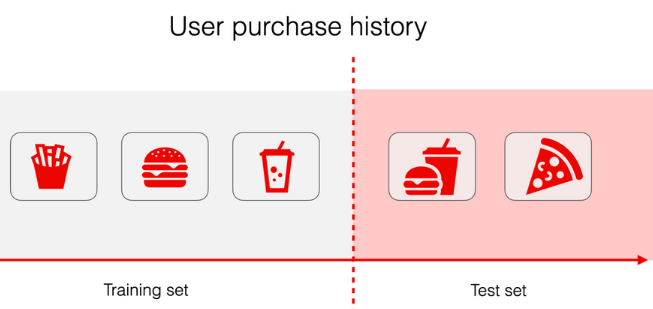

Допустим, для пользователя $u$ мы формируем выдачу $T_K(u)$ из топ-$K$ наиболее подходящих объектов. Для оценки, насколько выдача качественна, необходимо определять, действительно ли релевантен каждый предложенный объект $i$ или нет. Это значение, равное $0$ или $1$, обозначим за $r(u, i)$

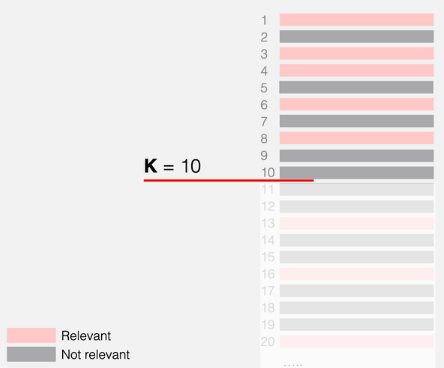


###Precision@K

Одной из наиболее распространённых метрик является точность $Precision@K$:

$$Precision@K = \frac{1}{K} \sum_{i \in T_K(u)} \mathbb{I}[r(u,i)=1]$$

Она показывает, какая доля объектов в топ-$K$ оказалась реально релевантной.

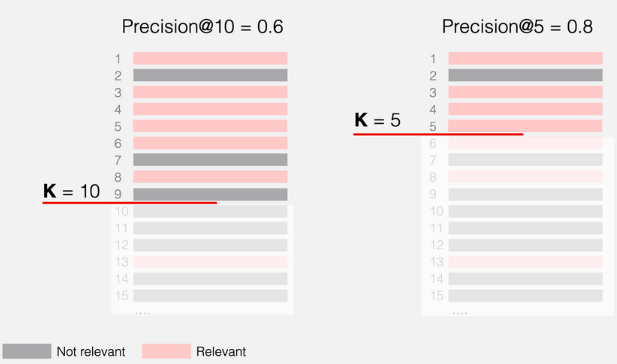


###Recall@K

Ещё одной популярной метрикой явлеется полнота $Recall@K$. Допустим, нам известен набор всех релевантных объектов $D$. Тогда метрика вычисляется как:

$$Recall@K = \frac{\sum_{i \in T_K(u)} \mathbb{I}[r(u,i)=1]}
  {\min\bigl(K,\sum_{d \in D}\mathbb{I}[r(u,i)=1]\bigr)},$$

Эта величина показывает, какую долю всех релевантных объектов охватывает рекомендательная система и показывает пользователю.

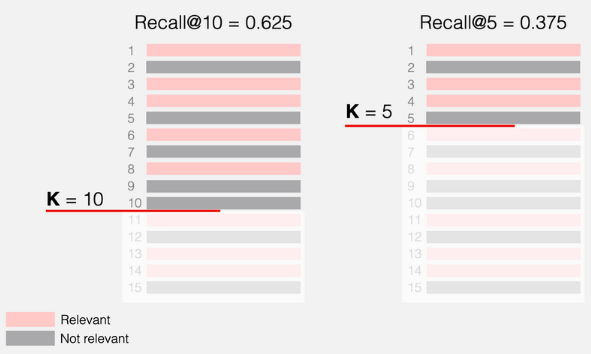

### Онлайн-оценка

**Онлайн-оценка** включает тестирование в режиме реального времени двух товаров $A$ и $B$ для определения их релевантности. Процесс начинается с разбиения пользователей на случайные группы: одна группа получает товар $A$, а другая — товар $B$.


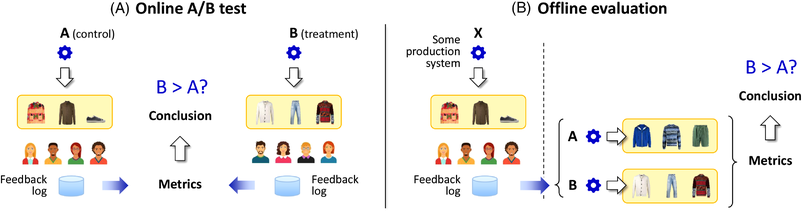

Данные о взаимодействии пользователей, например клик по объявлению или время просмотра рекламы, собираются в реальном времени и анализируются. Ключевыми **метриками** являются:

* Конверсия, то есть процент пользователей, заинтересовавшихся рекламой.
* Время, проведенное на странице.
* Уровень отказов.

## Дополнительные свойства рекомендательных систем

Высокая точность ранжирования не гарантирует полезность сервиса. Поэтому дополнительно анализируют следующие свойства.

### Полнота

Пусть имеется каталог объектов $I$, всего ${|I|}$ объектов, из них формируют подкаталог — выдачу $R$ из $|R|$ объектов. Тогда **полнота** ($coverage$):  

$$coverage = \frac{|R|}{|I|}$$

Метрика показывает, какую часть каталога $I$ система реально использует. Низкая полнота означает зацикливание на популярных айтемах.

### Новизна

**Новизна** ($novelty$) оценивает, насколько редко встречаются рекомендованные объекты. Пусть вероятность появления объекта $i$ в выдаче составляет $P(i)$, тогда **новизна**:

$$novelty = \frac{1}{|R|} \sum_{i \in R} -\log P(i),$$

Система, рекомендующая только популярное, имеет низкую новизну.

### Разнообразие

Метрика **разнообразия** ($diversity$) может быть рассчитана на основе разброса контентных векторов, насколько разные значения они принимают. Ещё одной метрикой является $Intra\ List\ Similarity\ (ILS)$, которая измеряется через среднюю схожесть объектов внутри списка рекомендаций:

$$ILS = \frac{1}{|R|} \sum_{i,j \in R} s(i,j)$$

Чем ниже значение, тем разнообразнее выдача.

### Serendipity

**Серендипность** отражает способность системы находить неожиданные, но релевантные объекты. Она растёт, если персонализированная модель предлагает то, что не предложила бы примитивная неперсонализованная стратегия.


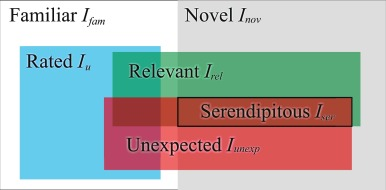

##Решение реальной задачи с Kaggle. Рекомендательная система для фильмов

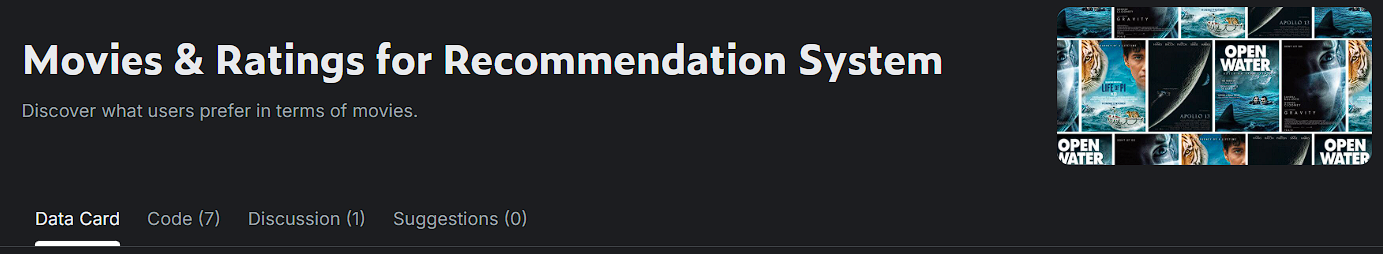

[Датасет](https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system) состоит из двух таблиц, одна из которых содержит названия и жанровую принадлежность 10 тысяч фильмов, а другая — данные о 100 тысячах оценок этих фильмов, выставленных разными пользователями.

Необходимо для заданного пользователя формировать выдачу наиболее релевантных фильмов, а для заданного фильма выдавать наиболее похожие на основе оценок пользователей.

###Сбор данных

Установим библиотеку для скачивания датасета

In [1]:
!pip install -q opendatasets

Сохраним токен Kaggle в необходимой для opendatasets директории.

In [2]:
from google.colab import files
import os

uploaded = files.upload()

Saving kaggle.json to kaggle.json


Скачаем датасет.

In [3]:
import opendatasets as od

url = 'https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system'
od.download(url)

Dataset URL: https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system


100%|██████████| 846k/846k [00:00<00:00, 293MB/s]

In [37]:
os.listdir('./movies-and-ratings-for-recommendation-system')

['movies.csv', 'ratings.csv']

###Исследование данных

Импортируем основные библиотеки для анализа данных.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считаем таблицы.

In [38]:
movies = pd.read_csv('movies-and-ratings-for-recommendation-system/movies.csv')
ratings = pd.read_csv('movies-and-ratings-for-recommendation-system/ratings.csv')

In [39]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Посмотрим на количество записей.

In [41]:
print('movies', movies.shape)
print('ratings', ratings.shape)

movies (9742, 3)
ratings (100836, 4)


Пропуски отсутствуют.

In [42]:
print(movies.isna().sum())
print(ratings.isna().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


###Коллаборативная система

Для начала реализуем колаборативную рекомендательную систему, то есть характеризующую фильмы на основе оценок пользователей. Используем метод `pivot_table`, который создаёт таблицу, строки которой соответствуют пользователям, а столбцы — оценкам, которые пользователи выставляли фильмам. Пропуски заполним нулями.

In [43]:
user_item = ratings.pivot_table(index='userId', columns='movieId', values='rating', aggfunc='mean').fillna(0)

In [44]:
user_item.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Получим списки с `id` фильмов и пользователей.

In [45]:
user_ids = user_item.index.tolist()
item_ids = user_item.columns.tolist()

Транспонируем, то есть зеркально отразим по диагонали, матрицу.

In [46]:
items_by_users = user_item.T.values

In [47]:
pd.DataFrame(items_by_users)

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Вычислим косинусные схожести между фильмами, представляя фильмы как векторы оценок пользователей.

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

collab_sim = cosine_similarity(items_by_users)

Полученная таблица содержит схожести между каждыми двумя фильмами.

In [65]:
pd.DataFrame(collab_sim).head()

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Видим, что таблица сильно **разреженная**, то есть в ней много нулей. Это не соответствует реальности: не так много фильмов имеют абсолютно нулевую схожесть. Поэтому полученный результат малоинформативен. Нули возникают, из-за того что лишь немногие пользователи ставят отметки.

Поэтому дополнительно используем контентный метод на основе категорий фильмов, а затем гибридно вычислим итоговый результат.

###TF-IDF. Анализ текстов

Ранее мы не сталкивались с задачей **обработки естественного языка** или случаями, когда категорий много и одни из них явно более частотны, а другие более редкие.

Например, текст можно характеризовать набором слов, которые в него входят, с учётом их частотности — **мешком слов**. Тогда схожесть двух текстов определяется тем, как много у них общих слов. Притом редкие, например "трансформатор" или "суслик", несут больше информации, чем союз "и" или предлог "в". В таких ситуациях применяют метрику $TF-IDF$ для частотного анализа текста.

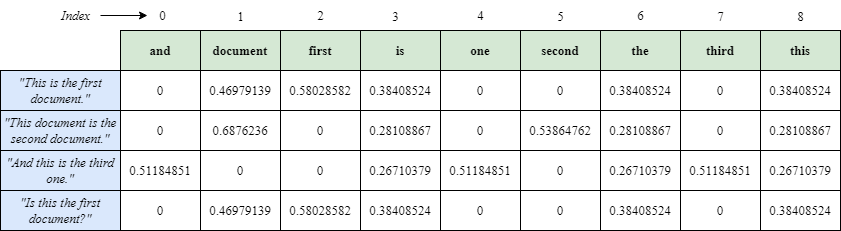

Пусть для **слова** (термина, $term$, $t$) в **документе** (тексте, $document$, $d$) величина $f_{t,d}$ — число появлений $t$ в документе $d$. **Частота термина** ($term\ frequency$) равна отношению этого числа к суммарному количеству слов в документе $d$:

$$tf_{t,d} = \frac{f_{t,d}}{\sum_{t'} f_{t',d}}$$

Пусть имеется $N$ документов, $df_t$ — число документов, содержащих термин $t$, тогда **обратная частота документа** ($inverse\ document\ frequency$):

$$idf_t = \log\frac{N}{df_t}$$

Чем меньшее количество документов содержит интересующее нас слово, тем эта величина больше. Перемножим её и рассчитанный выше коэффициент для получения **итогового веса** слова $t$ в документе $d$:

$$tfidf_{t,d} = tf_{t,d}\cdot idf_t$$

Отсюда и название $TF-IDF$.


###Контентные рекомендации

Аналогичная задача стоит перед нами при сравнении фильмов, для которых указаны **категории**. Категория "комедия" частотна и несёт мало информации, тогда как "артхаус" редок и глубже описывает жанровую принадлежность. Для каждого фильма можно получить $TF-IDF$-вектор, а схожесть вычислять как косинусное расстояние.

Отметим, что особенность наших данных такова, что каждая категория, то есть слово $t$, встречается для каждого фильма, то есть документа $d$, не более одного раза.

Для начала переиндексируем таблицу с фильмами по `id` фильмов.

In [51]:
movies_idx = movies.set_index('movieId')
movies_subset = movies_idx.reindex(item_ids)

Необходимый **векторизатор** для текстов, в нашем случае категорий фильмов, уже реализован в библиотеке `sklearn`. В таблице использован разделитель `|`. Поэтому инициализируем векторизатор так, чтобы он считал категорией всё, что не `|`.




In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(token_pattern='[^|]+')
tfidf_vectors = tfidf.fit_transform(movies_subset['genres'].astype(str))

Получили представления для каждого фильма в виде принадлежности к категориям из 20 различных.

In [55]:
tfidf_vectors.shape

(9724, 20)

Посчитаем скалярные произведения между контентными векторами.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

content_sim = linear_kernel(tfidf_vectors, tfidf_vectors)

In [64]:
pd.DataFrame(content_sim).head()

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,1.000000,0.813528,0.152627,0.134999,0.267517,0.0,0.152627,0.654593,0.0,0.262372,...,0.411311,0.465676,0.196433,0.51634,0.0,0.680408,0.755981,0.000000,0.421221,0.267517
1,0.813528,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.804635,0.0,0.322512,...,0.000000,0.000000,0.000000,0.00000,0.0,0.341472,0.379399,0.000000,0.000000,0.000000
2,0.152627,0.000000,1.000000,0.884500,0.570532,0.0,1.000000,0.000000,0.0,0.000000,...,0.185637,0.000000,0.418930,0.00000,0.0,0.181710,0.201893,0.000000,0.000000,0.570532
3,0.134999,0.000000,0.884500,1.000000,0.504636,0.0,0.884500,0.000000,0.0,0.000000,...,0.164196,0.201540,0.687253,0.00000,0.0,0.160723,0.178574,0.466539,0.000000,0.504636
4,0.267517,0.000000,0.570532,0.504636,1.000000,0.0,0.570532,0.000000,0.0,0.000000,...,0.325375,0.000000,0.734280,0.00000,0.0,0.318492,0.353868,0.000000,0.000000,1.000000


###Гибридная система

Отметим, что полученные значения из-за ошибок представления вещественных чисел в памети компьютера имеют отчасти нефизичный смысл: максимальные значения могут быть чуть больше $1$, а минимальные могут быть чуть меньше нуля.

In [61]:
content_sim.max()

np.float64(1.0000000000000004)

Ограничим значения через `clip`.

In [66]:
content_sim = np.clip(content_sim, 0, 1)
collab_sim = np.clip(collab_sim, 0, 1)

Сделаем итоговую оценку схожести, принимая контентные и коллаборативные подходы с равными весами.

In [67]:
alpha = 0.5
combined_sim = alpha * collab_sim + (1 - alpha) * content_sim

Получим менее разреженную матрицу схожестей.

In [116]:
pd.DataFrame(combined_sim)

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,1.000000,0.612045,0.224772,0.085286,0.288140,0.188158,0.215059,0.393111,0.116293,0.328973,...,0.205656,0.232838,0.098216,0.258170,0.0,0.340204,0.377991,0.00000,0.210610,0.133759
1,0.612045,1.000000,0.141219,0.053207,0.143897,0.148505,0.114288,0.488567,0.022418,0.370103,...,0.000000,0.000000,0.000000,0.000000,0.0,0.170736,0.189700,0.00000,0.000000,0.000000
2,0.224772,0.141219,1.000000,0.488453,0.494167,0.142128,0.701416,0.156717,0.152420,0.121477,...,0.092818,0.000000,0.209465,0.000000,0.0,0.090855,0.100946,0.00000,0.000000,0.285266
3,0.085286,0.053207,0.488453,1.000000,0.346506,0.044843,0.579768,0.079011,0.000000,0.047799,...,0.082098,0.100770,0.343626,0.000000,0.0,0.080361,0.089287,0.23327,0.000000,0.252318
4,0.288140,0.143897,0.494167,0.346506,1.000000,0.149484,0.522267,0.141762,0.167529,0.109030,...,0.162687,0.000000,0.367140,0.000000,0.0,0.159246,0.176934,0.00000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.340204,0.170736,0.090855,0.080361,0.159246,0.119626,0.090855,0.000000,0.217911,0.120467,...,0.841866,0.777205,0.616931,0.807364,0.5,1.000000,0.950016,0.50000,0.876773,0.159246
9720,0.377991,0.189700,0.100946,0.089287,0.176934,0.000000,0.100946,0.000000,0.000000,0.000000,...,0.772038,0.807995,0.629919,0.841503,0.5,0.950016,1.000000,0.50000,0.778592,0.176934
9721,0.000000,0.000000,0.000000,0.233270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.715995,0.839423,0.500000,0.5,0.500000,0.500000,1.00000,0.500000,0.000000
9722,0.210610,0.000000,0.000000,0.000000,0.000000,0.158751,0.000000,0.000000,0.289181,0.159867,...,0.884915,0.867868,0.500000,0.907890,0.5,0.876773,0.778592,0.50000,1.000000,0.000000


Реализуем функции выдачи релевантных объектов. Рекомендация топ-$K$ фильмов для пользователя:

In [98]:
def recommend_topk_for_user(user_id, k=10, sim_matrix=combined_sim):
    # Извлекаем индекс строки пользователя в таблице
    uidx = user_item.index.get_loc(user_id)
    # Получаем оценки, которые пользователь ставил фильмам
    user_ratings = user_item.values[uidx]
    # Маска для оценённых пользователем фильмов
    rated_mask = user_ratings > 0

    # Числитель формулы item-to-item — сумма s(i, j) * r(u, j)
    numer = sim_matrix.dot(user_ratings)
    # Знаменатель — сумма |s(i, j)| по оценённым пользователем фильмам
    denom = sim_matrix.dot(rated_mask.astype(float))
    # Скоринг
    scores = np.where(denom>0, numer/denom, 0.0)

    # Обнуляем уже просмотренные фильмы
    scores[rated_mask] = -np.inf
    # Получаем индексы топ-k
    top_idx = np.argsort(-scores)[:k]

    # Извлекаем релевантные фильмы из таблиц
    movie_ids = [user_item.columns[i] for i in top_idx]
    movie_ids_in_movies = movies['movieId'].isin(movie_ids)
    return movies[movie_ids_in_movies][['movieId', 'title', 'genres']]

Топ-$K$ похожих на данный фильмов:

In [ ]:
def similar_movies(movie_id, k=10, sim_matrix=combined_sim):
    # Индекс фильма
    midx = user_item.columns.get_loc(movie_id)
    # Набор схожестей фильмов с заданным
    sims = sim_matrix[midx].copy()

    # Отбор релевантных фильмов
    sims[midx] = -np.inf
    top_idx = np.argsort(-sims)[:k]

    # Извлекаем релевантные фильмы из таблиц
    movie_ids = [user_item.columns[i] for i in top_idx]
    movie_ids_in_movies = movies['movieId'].isin(movie_ids)
    return movies[movie_ids_in_movies][['movieId', 'title', 'genres']]

Функции для получения информации о пользователях и фильмах:

In [ ]:
def topk_rated_by_user(user_id, k=10):
    # Находим индекс пользователя в таблице user_item
    uidx = user_item.index.get_loc(user_id)
    # Извлекаем вектор оценок пользователя по всем фильмам
    user_ratings = user_item.values[uidx]

    # Оставляем только фильмы, которые пользователь оценивал
    rated_mask = user_ratings > 0
    rated_ratings = user_ratings[rated_mask]

    # Сортируем оценённые фильмы по убыванию оценки
    rated_indices = np.where(rated_mask)[0]
    top_idx = rated_indices[np.argsort(-rated_ratings)[:k]]

    # Восстанавливаем movieId по индексам колонок user_item
    movie_ids = [user_item.columns[i] for i in top_idx]
    movie_ids_in_movies = movies['movieId'].isin(movie_ids)
    return movies[movie_ids_in_movies][['movieId', 'title', 'genres']]

def movie_info(movie_id):
    movie_row = movies[movies['movieId'] == movie_id]
    return movie_row[['movieId', 'title', 'genres']].iloc[0]

Выберем какого-нибудь, например 103-го, пользователя и выведем топ понравившихся ему фильмов. Получим список из старых вестернов и фильмов в жанре крайм.

In [86]:
topk_rated_by_user(user_id=103, k=10)

,movieId,title,genres
15,16,Casino (1995),Crime|Drama
17,18,Four Rooms (1995),Comedy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
694,912,Casablanca (1942),Drama|Romance
824,1084,Bonnie and Clyde (1967),Crime|Drama
903,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western
907,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller
914,1213,Goodfellas (1990),Crime|Drama
923,1222,Full Metal Jacket (1987),Drama|War
9162,148626,"Big Short, The (2015)",Drama


Сделаем предикт для этого пользователя. Получим выдачу из старых фильмов в жанре крайм и вестерн, которые пользователь ещё не видел (не оценивал)

In [87]:
recommend_topk_for_user(user_id=103, k=10)

,movieId,title,genres
1251,1662,Gang Related (1997),Crime
1695,2280,Clay Pigeons (1998),Crime
1888,2511,"Long Goodbye, The (1973)",Crime|Film-Noir
2048,2727,Killer's Kiss (1955),Crime|Film-Noir
2179,2896,Alvarez Kelly (1966),Western
3601,4945,"Enforcer, The (1976)",Crime
3675,5063,One-Eyed Jacks (1961),Western
5067,7943,"Killers, The (1946)",Crime|Film-Noir
6188,44937,"Child, The (L'enfant) (2005)",Crime|Drama
7392,79677,"Two Escobars, The (2010)",Crime|Documentary


Выведем информацию о 17-м фильме. Это экранизация романа Джейн Остин "Чувство и чувствительность".

In [112]:
movie_info(17)

,16
movieId,17
title,Sense and Sensibility (1995)
genres,Drama|Romance


Выведем похожие фильмы. Все они также относятся к жанрам драма и романтика.

In [114]:
similar_movies(movie_id=17, k=10)

,movieId,title,genres
24,25,Leaving Las Vegas (1995),Drama|Romance
27,28,Persuasion (1995),Drama|Romance
42,46,How to Make an American Quilt (1995),Drama|Romance
115,140,Up Close and Personal (1996),Drama|Romance
444,509,"Piano, The (1993)",Drama|Romance
450,515,"Remains of the Day, The (1993)",Drama|Romance
630,802,Phenomenon (1996),Drama|Romance
1073,1393,Jerry Maguire (1996),Drama|Romance
1265,1680,Sliding Doors (1998),Drama|Romance
4101,5878,Talk to Her (Hable con Ella) (2002),Drama|Romance


Более того, второй фильм в выдаче — экранизация романа Джейн Остин "Доводы рассудка", то есть разработанная гибридная рекомендательная система улавливает не только жанровую принадлежность (контентные свойства фильмов), но и направленность интересов аудитории (коллаборативные свойства), что является **высоким показателем** качества работы алгоритма.

##Выводы

В ходе занятия мы:

1. Рассмотрели концепцию рекомендательной системы и её отличия от поисковой.
2. Формализовали задачу построения рекомендации.
3. Рассмотрели explicit и implicit фидбэк.
4. Привели описание коллаборативных, контентных и гибридных методов рекомендации.
5. Описали подходы к определению схожести между объектами.
6. Рассмотрели методы оценки качества работы рекомендательных систем и их хорошие свойства.
7. Реализовали гибридную рекомендательную систему фильмов на основе реального датасета.
8. Познакомились с метрикой TF-IDF для обработки естественного языка на примере векторизации категориальных признаков.

##Данные об авторе

Зюков Алексей Алексеевич,

лаборант отдела-онлайн образования НИЯУ МИФИ,

бакалавр кафедры суперкомпьютерных технологий в инженерно-физическом моделировании НИЯУ МИФИ.

##Список использованной и рекомендованной литературы

1. Бойцов, И. Хорошие свойства рекомендательных систем. – Текст : электронный / И. Бойцов ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/kontentnye-rekomendacii (дата обращения: 01.11.2025).
2. Воронцов, К. В. Коллаборативная фильтрация и матричные разложения : лекции / К. В. Воронцов. — МФТИ, 21.03.2025. — Режим доступа: http://www.machinelearning.ru/wiki/images/9/95/Voron-ML-CF.pdf (дата обращения: 01.11.2025).
3. Егоров, А. Д. Репозитории с лекциями по анализу данных в НИЯУ МИФИ. – Текст : электронный / А. Д. Егоров // GitHub : [сайт]. – URL: https://github.com/ShadarRim (дата обращения: 01.11.2025).
4. Иванов, С. Введение в рекомендательные системы. – Текст : электронный / С. Иванов ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/intro-recsys (дата обращения: 01.11.2025).
5. Логинов, Р. Задача ранжирования. – Текст : электронный / Р. Логинов ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/zadacha-ranzhirovaniya (дата обращения: 01.11.2025).
6. Малов, Д. А. Глубокое обучение и анализ данных : практическое руководство. / Д. А. Малов. – Текст : непосредственный. – Санкт-Петербург : БХВ-Петербург, 2023. – 272 с. : ил. – ISBN 978-5-9775-1172-8.
7. Норкин, Д. Метрические методы. – Текст : электронный / Д. Норкин ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/metricheskiye-metody (дата обращения: 01.11.2025).
8. Evidently AI Team. Ranking and Recommendation Metrics Guide: 10 metrics to evaluate recommender and ranking systems / Evidently AI. — [Электронный ресурс]. — URL: https://www.evidentlyai.com/ranking-metrics/evaluating-recommender-systems — (дата обращения: 01.11.2025).